<a href="https://colab.research.google.com/github/AnnaFattakhova/NLP-Course/blob/main/Fattakhova_task2_advanced_corrected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Критерии оценивания:

1. произведена сегментация на уровне предложений (1 балл)
2. произведена сегментация на уровне N-грамм (1 балл)
3. произведена сегментация на уровне слов (1 балл)
4. датасет опубликован на HF Datasets (1 балл)
5. оформлена карточка на HF Datasets (1 балл)
6. в карточке представлена информация о проведенном анализе (3 балла)
7. в карточке представлен частотный анализ слов в виде графика (1 балл)
8. в карточке представлен частотный анализ слов в виде облака (1 балл)

**В комментариях к блокноту нужно обязательно добавить ссылку на ваш датасет**

# Задача 2: Разметка датасета с HF Datasets: статистический анализ и визуализация

In [1]:
# Устанавливаем необходимые библиотеки
!pip install datasets nltk -q

# Импорт наших инструментов
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import datasets
import nltk
import string
import spacy
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.util import ngrams

# Загрузка необходимых ресурсов NLTK
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 9.0 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [2]:
nlp = spacy.load('en_core_web_sm')

**Задание**: загрузите текст для разметки

**Опции**:
1. использовать свой текст
2. использовать текст из задания 1: `https://github.com/vifirsanova/compling/blob/main/tasks/task1/data.txt`

In [3]:
### ваш код здесь ###
# Загружаем файл с гитхаба
!wget data.txt https://raw.githubusercontent.com/AnnaFattakhova/NLP-Course/refs/heads/main/датасет.txt -O dataset.txt

--2025-02-20 16:28:28--  http://data.txt/
Resolving data.txt (data.txt)... failed: Name or service not known.
wget: unable to resolve host address ‘data.txt’
--2025-02-20 16:28:28--  https://raw.githubusercontent.com/AnnaFattakhova/NLP-Course/refs/heads/main/%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56811 (55K) [text/plain]
Saving to: ‘dataset.txt’

dataset.txt         100%[===================>]  55.48K  --.-KB/s    in 0.005s  

2025-02-20 16:28:29 (11.7 MB/s) - ‘dataset.txt’ saved [56811/56811]

FINISHED --2025-02-20 16:28:29--
Total wall clock time: 0.4s
Downloaded: 1 files, 55K in 0.005s (11.7 MB/s)


**Шаг 2**: сегментация

Вы можете использовать любые библиотеки

In [8]:
# Открываем файл
with open("dataset.txt", 'r', encoding='utf-8') as file:
    text = file.read()
    text = re.sub(r'^.*?This is an accepted version of this page\s*', '', text, flags=re.IGNORECASE)
    text = re.sub(r'[^a-zA-Z\.\s]', '', text).strip()  # Удаляем все, кроме букв, пробелов и точек
    text = re.sub(r'\s+', ' ', text)  # Заменяем двойные пробелы на одинарные

In [10]:
#сегментация по предложениям

nltk.download('punkt_tab')

#Cегментация текста на уровне предложений, слов и биграмм
sentences = sent_tokenize(text)  # Сегментация на предложения
words_per_sentence = [word_tokenize(sent.lower()) for sent in sentences]  # Слова для каждого предложения
words_per_sentence = [[word for word in words if word not in string.punctuation] for words in words_per_sentence]  # Очистка от пунктуации
bigrams_per_sentence = [list(ngrams(words, 2)) for words in words_per_sentence]  # Генерация биграмм для каждого предложения
print("\n Сегментация на уровне предложений \n")
print(sentences)

print("\n Сегментация на уровне слов \n")
print(words_per_sentence)

print("\n Сегментация на уровне биграмм \n")
print(bigrams_per_sentence)


 Сегментация на уровне предложений 

['This is an accepted version of this page A dragon is a magical legendary creature that appears in the folklore of multiple cultures worldwide.', 'Beliefs about dragons vary considerably through regions but dragons in Western cultures since the High Middle Ages have often been depicted as winged horned and capable of breathing fire.', 'Dragons in eastern cultures are usually depicted as wingless fourlegged serpentine creatures with aboveaverage intelligence.', 'Commonalities between dragons traits are often a hybridization of feline reptilian mammalian and avian features.', 'The word dragon entered the English language in the early th century from Old French dragon which in turn comes from Latin draco genitive draconis meaning huge serpent dragon from Ancient Greek drkn genitive drkontos serpent.', 'The Greek and Latin term referred to any great serpent not necessarily mythological.', 'The Greek word is most likely derived from the Greek verb drko

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
"""

ОБРАЗЕЦ ОЖИДАЕМОГО РЕЗУЛЬТАТА ВЫДАЧИ:

- ПРОВЕРЬТЕ ВАШ РЕЗУЛЬТАТ,
- СРАВНИТЕ ЕГО С ОБРАЗЦОМ ПЕРЕД СДАЧЕЙ РАБОТЫ

"""

НА УРОВНЕ ПРЕДЛОЖЕНИЙ:
['Your sample text goes here', 'Replace this string with your dataset or a larger text corpus']

НА УРОВНЕ СЛОВ:
['your', 'sample', 'text', 'goes', 'here', 'replace', 'this', 'string', 'with', 'your', 'dataset', 'or', 'a', 'larger', 'text', 'corpus']

НА УРОВНЕ БИГРАММ:
[('your', 'sample'), ('sample', 'text'), ('text', 'goes'), ('goes', 'here'), ('here', 'replace'), ('replace', 'this'), ('this', 'string'), ('string', 'with'), ('with', 'your'), ('your', 'dataset'), ('dataset', 'or'), ('or', 'a'), ('a', 'larger'), ('larger', 'text'), ('text', 'corpus')]


Далее вы должны самостоятельно принять решение о том, как должен выглядеть ваш датафрейм

В датафрейме вы должны представить 3 типа сегментации текста

Используйте pandas, чтобы оформить свой датасет

In [24]:
import pandas as pd
import numpy as np

# Создание датасета, в котором столбцы - это предложения, слова и биграммы, а пустые дячейки заполнены NA
def dataset(sentences, words, bigrams):

        df = pd.DataFrame({
            "Sentences": sentences,
            "Words": [', '.join(words) for words in words_per_sentence],
            "Bigrams": [', '.join(['_'.join(bigram) for bigram in bigrams]) for bigrams in bigrams_per_sentence] # это запись биграмм через нижнее подчеркивание
            #"Bigrams": [', '.join([f"({bigram[0]}_{bigram[1]})" for bigram in bigrams]) for bigrams in bigrams_per_sentence] # это биграммы в скобках
        })
        return df

df = dataset(sentences, words_per_sentence, bigrams_per_sentence)

In [25]:
# Просматриваем датасет
df.head()

,Sentences,Words,Bigrams
0,This is an accepted version of this page A dra...,"this, is, an, accepted, version, of, this, pag...","this_is, is_an, an_accepted, accepted_version,..."
1,Beliefs about dragons vary considerably throug...,"beliefs, about, dragons, vary, considerably, t...","beliefs_about, about_dragons, dragons_vary, va..."
2,Dragons in eastern cultures are usually depict...,"dragons, in, eastern, cultures, are, usually, ...","dragons_in, in_eastern, eastern_cultures, cult..."
3,Commonalities between dragons traits are often...,"commonalities, between, dragons, traits, are, ...","commonalities_between, between_dragons, dragon..."
4,The word dragon entered the English language i...,"the, word, dragon, entered, the, english, lang...","the_word, word_dragon, dragon_entered, entered..."


In [26]:
# Сохраняем датасет в формате csv
df.to_csv('data.csv', encoding='utf-8')

In [28]:
from datasets import Dataset

# Создаем рандомные UUID (уникальные номера)
import uuid

df["ID"] = [str(uuid.uuid4()) for _ in range(len(df))]  # Генерация уникального UUID для каждой строки
df = df[["ID"] + [col for col in df.columns if col != "ID"]] # Перемещаем столбец ID в начало

# Сохраняем на Hugging Face
dataset = Dataset.from_pandas(df)
dataset.push_to_hub("dragon_dataset", token="") #токен удален из соображений безопасности

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/avfattakhova/dragon_dataset/commit/829b74dc54c9df4c65e509d0a65e55500475bd38', commit_message='Upload dataset', commit_description='', oid='829b74dc54c9df4c65e509d0a65e55500475bd38', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/avfattakhova/dragon_dataset', endpoint='https://huggingface.co', repo_type='dataset', repo_id='avfattakhova/dragon_dataset'), pr_revision=None, pr_num=None)

1. Анализ уникальности данных

Доля уникальных слов: Рассчитать процент уникальных слов в корпусе.
Коэффициент лексического разнообразия (Type-Token Ratio, TTR): Отношение числа уникальных слов к общему количеству слов.

2. Анализ частоты POS-тегов

Использовать библиотеку spacy для разметки текста на части речи (POS tagging) и выделения наиболее часто встречающихся POS-тегов.

3. Анализ совместной встречаемости

Создать матрицу ко-частотности слов для анализа совместного появления терминов.

In [ ]:
# ваш код здесь
# 1) Анализ уникальности данных

unique_words = set(words)
lexical_diversity = len(unique_words) / len(words)

print("Unique words:", unique_words)
print("Lexical diversity:", lexical_diversity)

Unique words: {'wild', 'nineyearold', 'offer', 'mythography', 'azhi', 'hornless', 'firebreathing', 'planted', 'snakelike', 'family', 'represents', 'northern', 'or', 'lng', 'fully', 'let', 'alluded', 'items', 'iolaus', 'imputed', 'back', 'establishing', 'pointed', 'path', 'fed', 'entire', 's', 'chinese', 'jabberwock', 'fallen', 'apparition', 'returned', 'emblem', 'existence', 'copied', 'blood', 'shun', 'egyptian', 'paintings', 'grass', 'denwen', 'ships', 'age', 'huang', 'used', 'chiyou', 'protagonist', 'mortally', 'instead', 'la', 'betray', 'huangdi', 'drive', 'fivetaloned', 'countryside', 'akkadian', 'baal', 'mythical', 'hero', 'including', 'bowl', 'fights', 'terrible', 'dr', 'ma', 'female', 'threetoed', 'knocks', 'historicized', 'mothers', 'pit', 'legend', 'committed', 'laid', 'unbidden', 'preserved', 'inherited', 'thundergod', 'rooster', 'area', 'floating', 'calendar', 'terrified', 'shape', 'punningly', 'neolithic', 'yamashiro', 'nemal', 'surrounding', 'greed', 'mesopotamian', 'silla

In [ ]:
# 2) Анализ частоты POS-тегов
import spacy

nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
pos_counts = Counter([token.pos_ for token in doc])

most_common_pos = pos_counts.most_common(5)
print("Top-5 POS tags:", most_common_pos) #Вывод пяти самых частотных

Top-5 POS tags: [('NOUN', 1921), ('ADP', 1207), ('DET', 1108), ('VERB', 1083), ('PROPN', 1000)]


In [ ]:
# 3) Анализ совместной встречаемости
from sklearn.feature_extraction.text import CountVectorizer

# Создаем векторизатор с unigram (1-gram)
vectorizer = CountVectorizer(ngram_range=(1, 1), max_features=2000)
X = vectorizer.fit_transform(sentences)

# Вычисляем ко-частотную матрицу
co_occurrence_matrix = (X.T * X).toarray()
# Заполняем диагональ нулями (чтобы не учитывать встречаемость Х с Х)
np.fill_diagonal(co_occurrence_matrix, 0)

# Получаем список уникальных слов
un_words = vectorizer.get_feature_names_out()

# Создаем DataFrame для удобного вывода
co_matrix_df = pd.DataFrame(co_occurrence_matrix, index=un_words, columns=un_words)

# Вывод матрицы
print("Матрица ко-частотности слов:")
print(co_matrix_df)

Матрица ко-частотности слов:
             abducted  abilities  ability  able  about  aboveaverage  \
abducted            0          0        0     0      0             0   
abilities           0          0        0     0      0             0   
ability             0          0        0     0      1             0   
able                0          0        0     0      0             0   
about               0          0        1     0      0             0   
...               ...        ...      ...   ...    ...           ...   
zmeu                0          0        0     0      0             0   
zmey                0          0        0     0      0             0   
zmeya               0          0        0     0      0             0   
zmiy                0          0        0     0      0             0   
zoroastrian         0          0        0     0      0             0   

             accepted  accidentally  accompanied  accompanying  ...  zhuan  \
abducted            0       

In [ ]:
co_matrix_df.to_csv("co_occurrence_matrix.csv", encoding="utf-8")

**Шаг 4**: визуализируйте данные по образцу

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


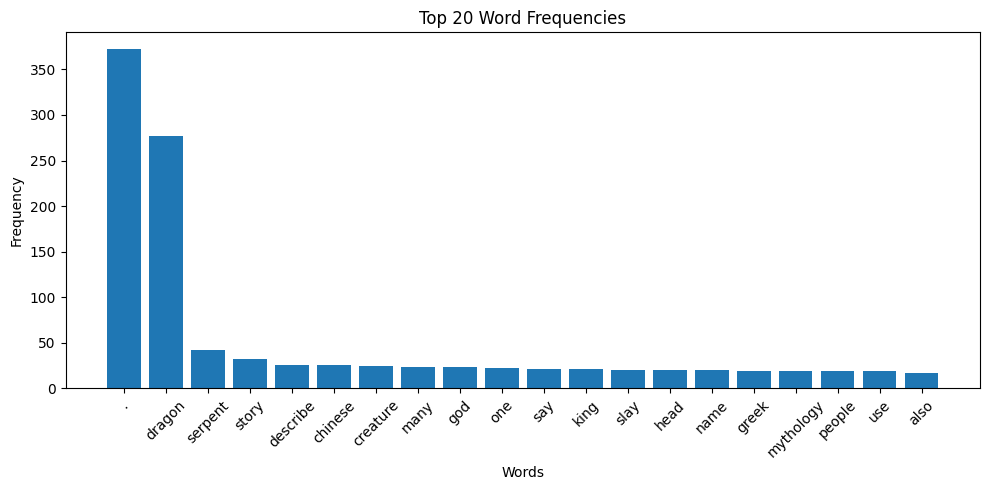

In [ ]:
# Удаление стоп-слов и лемматизация
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # Загрузка стандартных стоп-слов на английском языке
cleaned_words = [
    nlp(word)[0].lemma_  # Лемматизация с помощью spaCy
    for word in words
    if word not in stop_words # Удаляем стоп-слова
]

# Подсчет частоты слов
word_counts = Counter(cleaned_words)

# Word Frequency Plot
plt.figure(figsize=(10, 5))
plt.bar(*zip(*word_counts.most_common(20)))
plt.title("Top 20 Word Frequencies")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("word_frequency_plot.png")
plt.show()

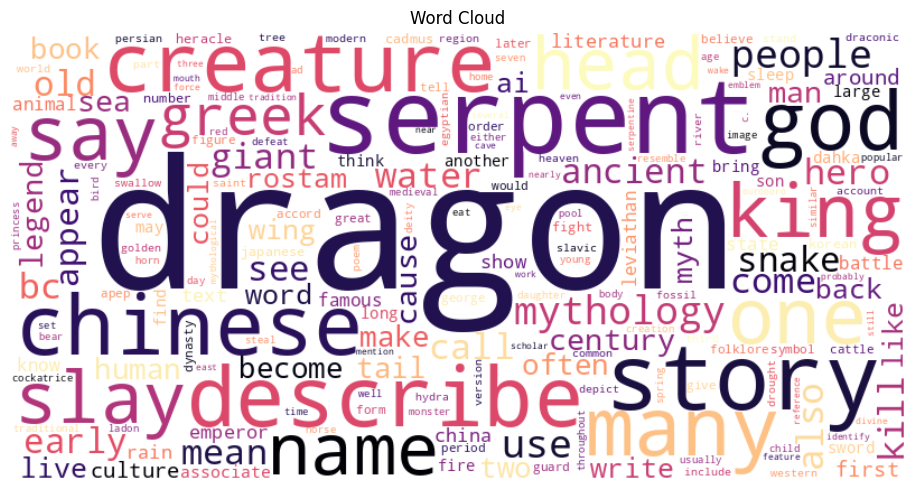

In [ ]:
# Word Cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='magma'  # Используем палитру magma для изменения оттенков
).generate_from_frequencies(word_counts)

# Визуализация
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud")
plt.tight_layout()
plt.savefig("word_cloud.png")
plt.show()

**Шаг 5**: отправляем на HF Datasets сегментированные данные и оформляем карточку

Что должно быть представлено в карточке:

- результат статистического анализа 3-х типов
- выводы по проведенному анализу
  - какой анализ был проведен?
  - в чем заключается основная идея этого анализа и зачем он нужен?
  - какие тренды удалось выявить?
- гистограмма
- облако слов